# Business Case: Scaler(Clustering)

- Scaler, a leading online tech-versity, offers intensive computer science and data science courses designed to upskill software professionals. Through live classes delivered by industry experts and tech leaders, Scaler provides a meticulously structured program that keeps learners abreast of the latest technologies and industry trends.
- Developed by InterviewBit, Scaler's modern curriculum is tailored to enhance the technical and problem-solving skills of its students, preparing them for successful careers in the tech industry. 
- This case study focuses on leveraging Scaler's rich database to profile top companies and job positions by clustering learners based on their job profiles, companies, and other relevant features.

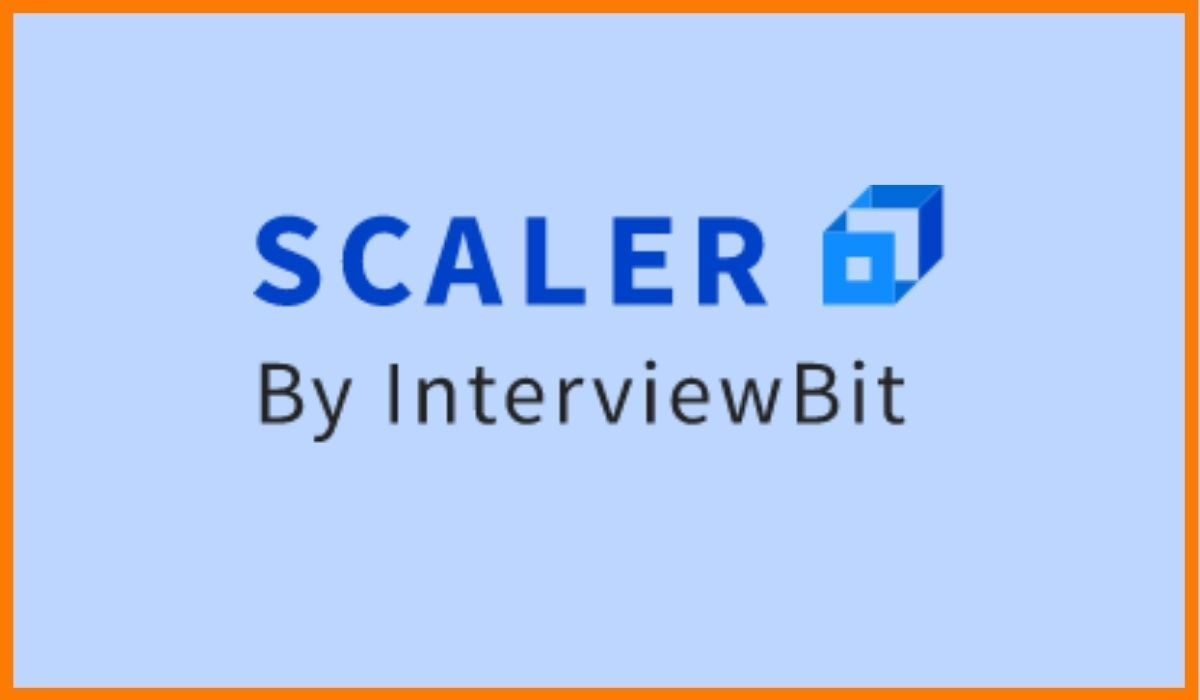

## Objective:

To develop a clustering model that groups Scaler learners into distinct clusters based on their job profiles, companies, and other relevant features, enabling the identification of common characteristics within each cluster to enhance targeted career recommendations and insights.

## Dataset Information:

### Source:
Please check the dataset at: "[Dataset Link](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/856/original/scaler_clustering.csv)"

### Feature Information:
- **‘Unnamed 0’:** Index of the dataset.
- **Email_hash:**  Anonymised Personal Identifiable Information (PII).
- **Company_hash:** This represents an anonymized identifier for the company, which is the current employer of the learner.
- **orgyear:** Employment start date.
- **CTC:** Current CTC.
- **Job_position:** Job profile in the company.
- **CTC_updated_year:** Year in which CTC got updated (Yearly increments, Promotions).

## Loading the "scaler_clustering.csv" Dataset:
For exploring and analysing first we import the Python libraries like numpy,pandas,matplotlib,Seaborn,Scipy and then import the "scaler_clustering.csv" dataset and save it in a dataframe "df".

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

import missingno as msno
import re

from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [14]:
df = pd.read_csv("scaler_clustering.csv")

In [15]:
# getting the top 5 records of the dataframe

df.head()

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0


# Basic Exploration of Data

In [16]:
# getting the shape of the dataframe

df.shape

(205843, 7)

In [17]:
# dropping the column 'Unnamed: 0'

df.drop("Unnamed: 0", inplace = True, axis = 1)

In [18]:
# getting the columns of the dataframe

df.columns

Index(['company_hash', 'email_hash', 'orgyear', 'ctc', 'job_position',
       'ctc_updated_year'],
      dtype='object')

In [19]:
# getting the data types of columns

df.dtypes

company_hash         object
email_hash           object
orgyear             float64
ctc                   int64
job_position         object
ctc_updated_year    float64
dtype: object

In [20]:
# Replace inf and -inf with nan
df['orgyear'] = df['orgyear'].replace([np.inf, -np.inf, 'nan'], np.nan)

In [21]:
# getting the number of unique values in each column

df.nunique()

company_hash         37299
email_hash          153443
orgyear                 77
ctc                   3360
job_position          1017
ctc_updated_year         7
dtype: int64

In [22]:
# getting the info of the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   company_hash      205799 non-null  object 
 1   email_hash        205843 non-null  object 
 2   orgyear           205757 non-null  float64
 3   ctc               205843 non-null  int64  
 4   job_position      153281 non-null  object 
 5   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.4+ MB


In [23]:
# Checking for duplicate records

df.duplicated().sum()

33

In [24]:
# Dropping the duplicate records

df.drop_duplicates(inplace = True)

In [25]:
# Checking for missing values

df.isnull().sum()

company_hash           44
email_hash              0
orgyear                86
ctc                     0
job_position        52547
ctc_updated_year        0
dtype: int64

In [26]:
# Checking for percentage of missing values

100 * df.isnull().sum()/len(df)

company_hash         0.021379
email_hash           0.000000
orgyear              0.041786
ctc                  0.000000
job_position        25.531801
ctc_updated_year     0.000000
dtype: float64

total number of obseration is: 205810


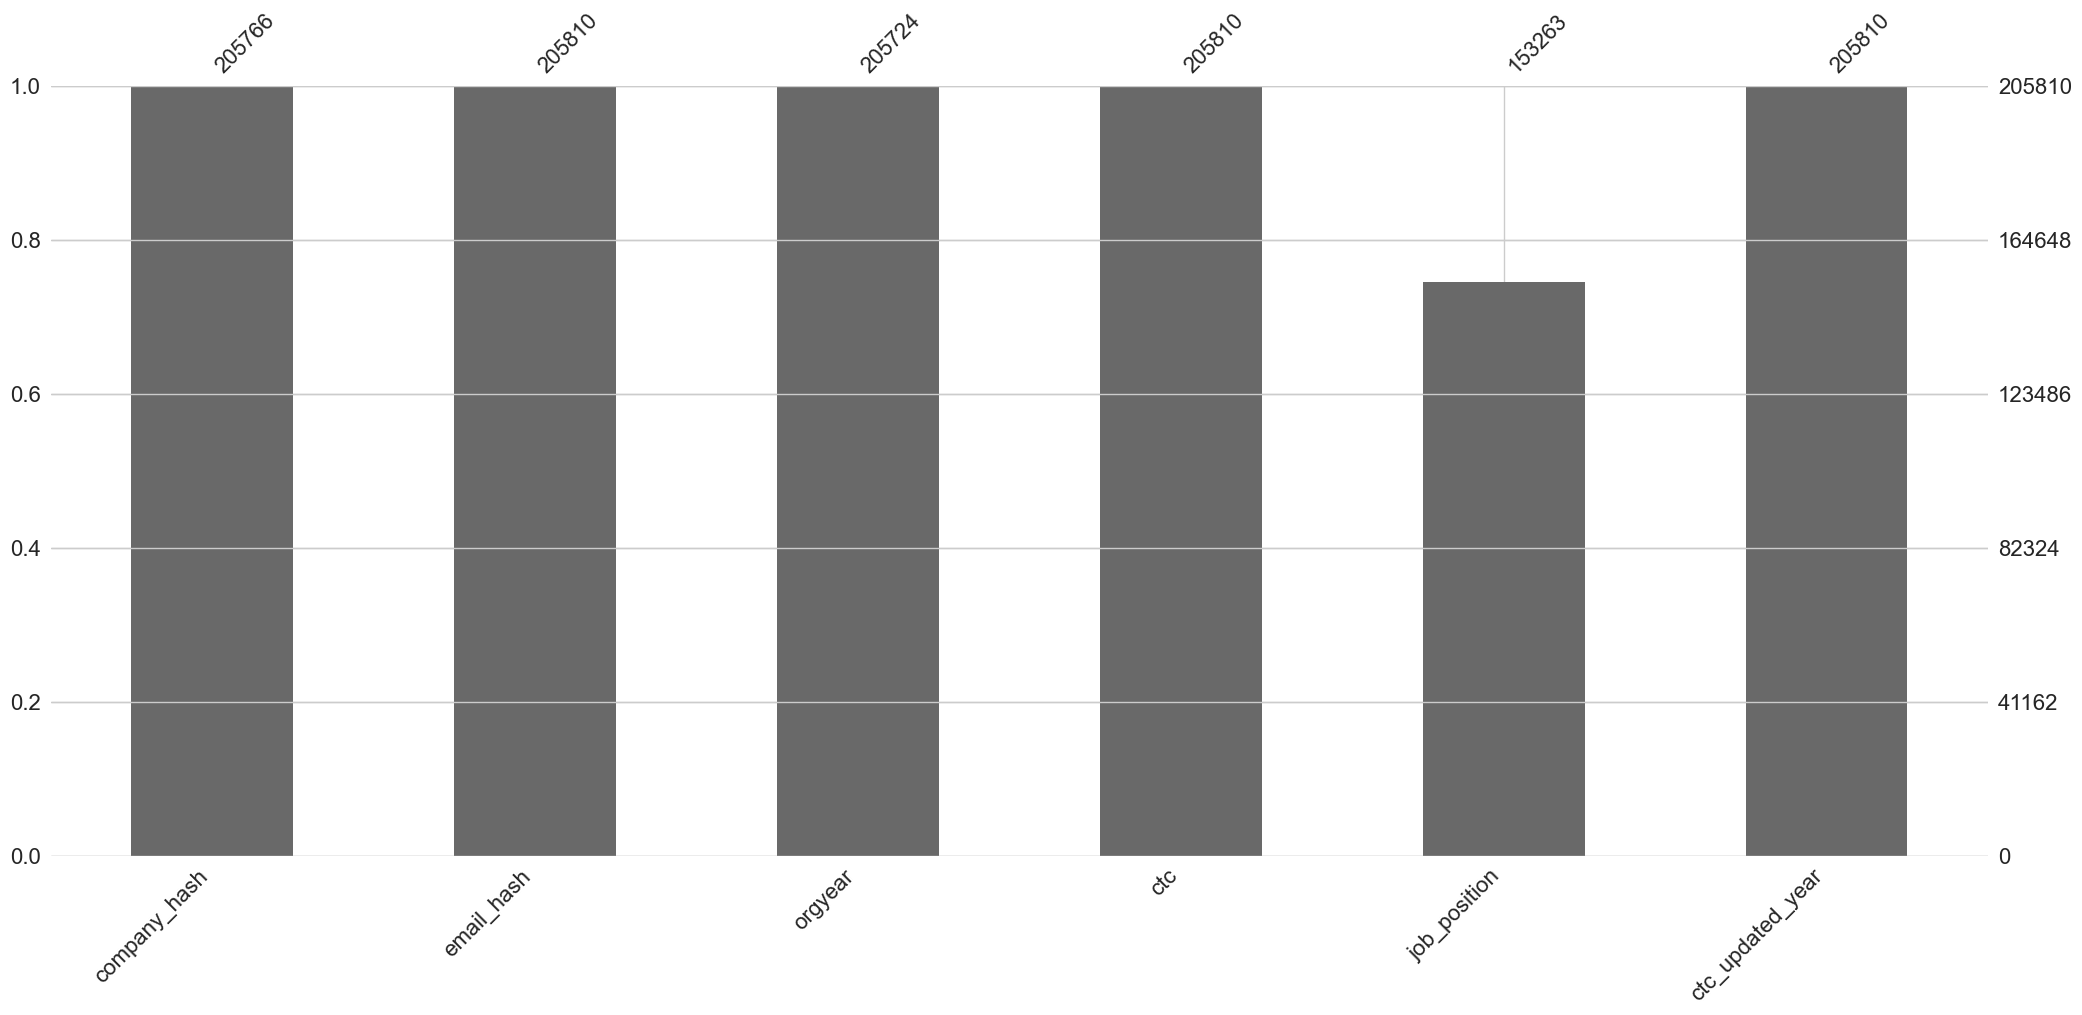

In [27]:
print ('total number of obseration is:',df.shape[0])

msno.bar(df)
plt.show()

- It seems there are large number of missing values in job_position and the substantial number of missing values in orgyear and company_hash.

# Data Preprocessing

## Data Cleaning:

In [28]:
# getting the unique values in each column

df.nunique()

company_hash         37299
email_hash          153443
orgyear                 77
ctc                   3360
job_position          1017
ctc_updated_year         7
dtype: int64

In [29]:
df['orgyear'].min(), df['orgyear'].max()

(0.0, 20165.0)

In [30]:
print(sorted(df['orgyear'].unique()))

[1973.0, 1981.0, 1990.0, 1991.0, 1992.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0, 2017.0, 2018.0, 2019.0, 2020.0, 2021.0, 2022.0, 2023.0, 2031.0, nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 38.0, 83.0, 91.0, 200.0, 201.0, 206.0, 208.0, 209.0, 1900.0, 1970.0, 1971.0, 1972.0, 1976.0, 1977.0, 1979.0, 1982.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0, 1993.0, 2024.0, 2025.0, 2026.0, 2027.0, 2028.0, 2029.0, 2101.0, 2106.0, 2107.0, 2204.0, 20165.0]


In [31]:
df['ctc_updated_year'].min(), df['ctc_updated_year'].max()

(2015.0, 2021.0)

In [32]:
print(sorted(df['ctc_updated_year'].unique()))

[2015.0, 2016.0, 2017.0, 2018.0, 2019.0, 2020.0, 2021.0]


In [33]:
# filtering the records where start_year of job for a person not less than 2013 and not greater than current_year.

df = df[df['orgyear'].between(2013, 2024)]

In [34]:
df.shape

(162896, 6)

In [35]:
# Getting min and max ctc

df['ctc'].min(), df['ctc'].max()

(2, 1000150000)

In [36]:
# df[df['ctc']<60000]

In [37]:
# df[df['ctc']>20000000]

- Since there are very low and very high salaries which is doubtful we will remove those records for further analysis.

In [38]:
# Filtering the records where ctc is between 60000 and 20000000

df = df[(df['ctc']>=60000) & (df['ctc']<=20000000)]

In [39]:
df.shape

(159378, 6)

In [40]:
# Getting all unique job positions
unique_jobs = df['job_position'].unique()

# Defining the regex pattern to match job positions that contain only numbers
pattern = re.compile(r'^\d+$', re.IGNORECASE)

# Filter the unique job positions that match the pattern
filtered_jobs = [job for job in unique_jobs if isinstance(job, str) and pattern.match(job)]
print(filtered_jobs)


['857628', '7', '896651', '91', '737']


In [41]:
# Removing the records which contains numbers as 'job_position'

df = df[~df['job_position'].isin(filtered_jobs)]

In [42]:
df.shape

(159373, 6)

## Imputation of Missing Values:

In [43]:
df.nunique()

company_hash         28127
email_hash          115283
orgyear                 12
ctc                   2366
job_position           772
ctc_updated_year         7
dtype: int64

In [44]:
# getting the null values in the features

df.isnull().sum()

company_hash           35
email_hash              0
orgyear                 0
ctc                     0
job_position        43921
ctc_updated_year        0
dtype: int64

In [45]:
# Filling the null values with "Unknown" category

df['job_position'] = df['job_position'].fillna("Unknown")
df['company_hash'] = df['company_hash'].fillna("Unknown")

In [46]:
df.isnull().sum()

company_hash        0
email_hash          0
orgyear             0
ctc                 0
job_position        0
ctc_updated_year    0
dtype: int64

- Now, we have treated the missing values and got the DataFrame as df.

## Data Transformation:

In [47]:
# changing the dtypes of 'orgyear' and 'ctc_updated_year' to int

df['orgyear'] = df['orgyear'].astype('int')
df['ctc_updated_year'] = df['ctc_updated_year'].astype('int')

In [48]:
df['start_year'] = df.groupby('email_hash')['orgyear'].transform(min)
df['current_year'] = df.groupby('email_hash')['ctc_updated_year'].transform(max)

In [49]:
# Creating new feature as 'total_YoE'

df['total_YoE'] = df['current_year']-df['start_year']

In [50]:
# Filtering the records where total_YoE is positive

df = df[df['total_YoE'] >= 0]

In [51]:
df.shape

(151793, 9)

In [52]:
df.head(3)

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,start_year,current_year,total_YoE
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016,1100000,Other,2020,2016,2020,4
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018,449999,FullStack Engineer,2019,2018,2019,1
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015,2000000,Backend Engineer,2020,2015,2020,5


In [53]:
df = df.sort_values(by = ['email_hash','current_year'], ascending = [1,0])
df.head(10)

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,start_year,current_year,total_YoE
506,nqsn axsxnvr,0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...,2013,250000,Backend Engineer,2020,2013,2020,7
947,nvnv wgzohrnvzwj otqcxwto,0001b94dbb1e85477b07fb6558ead3456c3735893c81f4...,2018,380000,Database Administrator,2020,2018,2021,3
113885,nvnv wgzohrnvzwj otqcxwto,0001b94dbb1e85477b07fb6558ead3456c3735893c81f4...,2018,450000,Database Administrator,2021,2018,2021,3
7781,xzeqvwrgha ntwyzgrgsxto,00022dc29c7f77032275182b883d4f273ea1007aefc437...,2016,750000,Frontend Engineer,2019,2016,2020,4
181546,vqtkkgopj,00022dc29c7f77032275182b883d4f273ea1007aefc437...,2016,750000,Frontend Engineer,2020,2016,2020,4
141757,gutzcgj,000411b5d6d4e1c113bf83f1eebc0b835d77cc45bded1d...,2017,3500000,Unknown,2021,2017,2021,4
156922,sgowvrt sqghu xzw,000411b5d6d4e1c113bf83f1eebc0b835d77cc45bded1d...,2017,1600000,Frontend Engineer,2021,2017,2021,4
15870,qvjxto srgmvr ogrhnxgzo ucn rna,00043b052fd338e6d80c2b957deccc40d582f4f5614634...,2018,250000,Frontend Engineer,2021,2018,2021,3
197515,thrtq ojontbo,000467b0e6a1fcc95b882052b63d0d783196327087f76b...,2019,3600000,Backend Engineer,2020,2019,2020,1
118472,btqwtatomtzk qtotvqwy vza atctrgubtzn xzaxv,00053f5036774ef0caa40369337b12019420210d9e8625...,2018,1050000,Backend Engineer,2021,2018,2021,3


In [54]:
agg_functions = {
    'company_hash':'first',
    'orgyear':'last',
    'ctc':'max',
    'job_position':'first',
    'current_year':'max',
    'total_YoE':'first'
}

grouped_df = df.groupby('email_hash').agg(agg_functions).reset_index()
grouped_df.head()

,email_hash,company_hash,orgyear,ctc,job_position,current_year,total_YoE
0,0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...,nqsn axsxnvr,2013,250000,Backend Engineer,2020,7
1,0001b94dbb1e85477b07fb6558ead3456c3735893c81f4...,nvnv wgzohrnvzwj otqcxwto,2018,450000,Database Administrator,2021,3
2,00022dc29c7f77032275182b883d4f273ea1007aefc437...,xzeqvwrgha ntwyzgrgsxto,2016,750000,Frontend Engineer,2020,4
3,000411b5d6d4e1c113bf83f1eebc0b835d77cc45bded1d...,gutzcgj,2017,3500000,Unknown,2021,4
4,00043b052fd338e6d80c2b957deccc40d582f4f5614634...,qvjxto srgmvr ogrhnxgzo ucn rna,2018,250000,Frontend Engineer,2021,3


In [55]:
grouped_df.shape

(108702, 7)

In [56]:
import re

def clean_string(x):
    if isinstance(x, str):
        return re.sub('[^A-Za-z0-9 ]+', '', x)
    else:
        return x

grouped_df['company_hash'] = grouped_df['company_hash'].apply(clean_string)


In [57]:
data = grouped_df.copy()

In [58]:
data.head()

,email_hash,company_hash,orgyear,ctc,job_position,current_year,total_YoE
0,0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...,nqsn axsxnvr,2013,250000,Backend Engineer,2020,7
1,0001b94dbb1e85477b07fb6558ead3456c3735893c81f4...,nvnv wgzohrnvzwj otqcxwto,2018,450000,Database Administrator,2021,3
2,00022dc29c7f77032275182b883d4f273ea1007aefc437...,xzeqvwrgha ntwyzgrgsxto,2016,750000,Frontend Engineer,2020,4
3,000411b5d6d4e1c113bf83f1eebc0b835d77cc45bded1d...,gutzcgj,2017,3500000,Unknown,2021,4
4,00043b052fd338e6d80c2b957deccc40d582f4f5614634...,qvjxto srgmvr ogrhnxgzo ucn rna,2018,250000,Frontend Engineer,2021,3


In [59]:
data.shape

(108702, 7)

- Finally, we have transformed dataset 'data' in proper format for further analysis.

# Exploratory Data Analysis

## Statistical Summary:

In [60]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
orgyear,108702.0,2.016510e+03,2.125969e+00,2013.0,2015.0,2016.0,2018.0,2024.0
ctc,108702.0,1.168807e+06,1.227574e+06,60000.0,500000.0,810000.0,1400000.0,20000000.0
current_year,108702.0,2.019723e+03,1.217379e+00,2015.0,2019.0,2020.0,2021.0,2021.0
total_YoE,108702.0,3.218570e+00,2.009265e+00,0.0,2.0,3.0,5.0,8.0


- orgyear is fairly recent with a slight concentration in the years 2015-2018.
- ctc shows significant variation with possible outliers affecting the mean and standard deviation.
- current_year/salary_updated_year is recent and tightly clustered around the mean.
- total_YoE shows a diverse range of experience levels, with most individuals having between 2 to 8 years of experience.

In [61]:
data.describe(include = 'O').T

,count,unique,top,freq
email_hash,108702,108702,0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...,1
company_hash,108702,26360,nvnv wgzohrnvzwj otqcxwto,4520
job_position,108702,525,Unknown,25499


- The data shows a large variety of company_hashes with a few appearing more frequently.
- "Unknown" category is the most common job_position in the dataset, with a high frequency compared to other job_positions.

## Univariate Analysis:

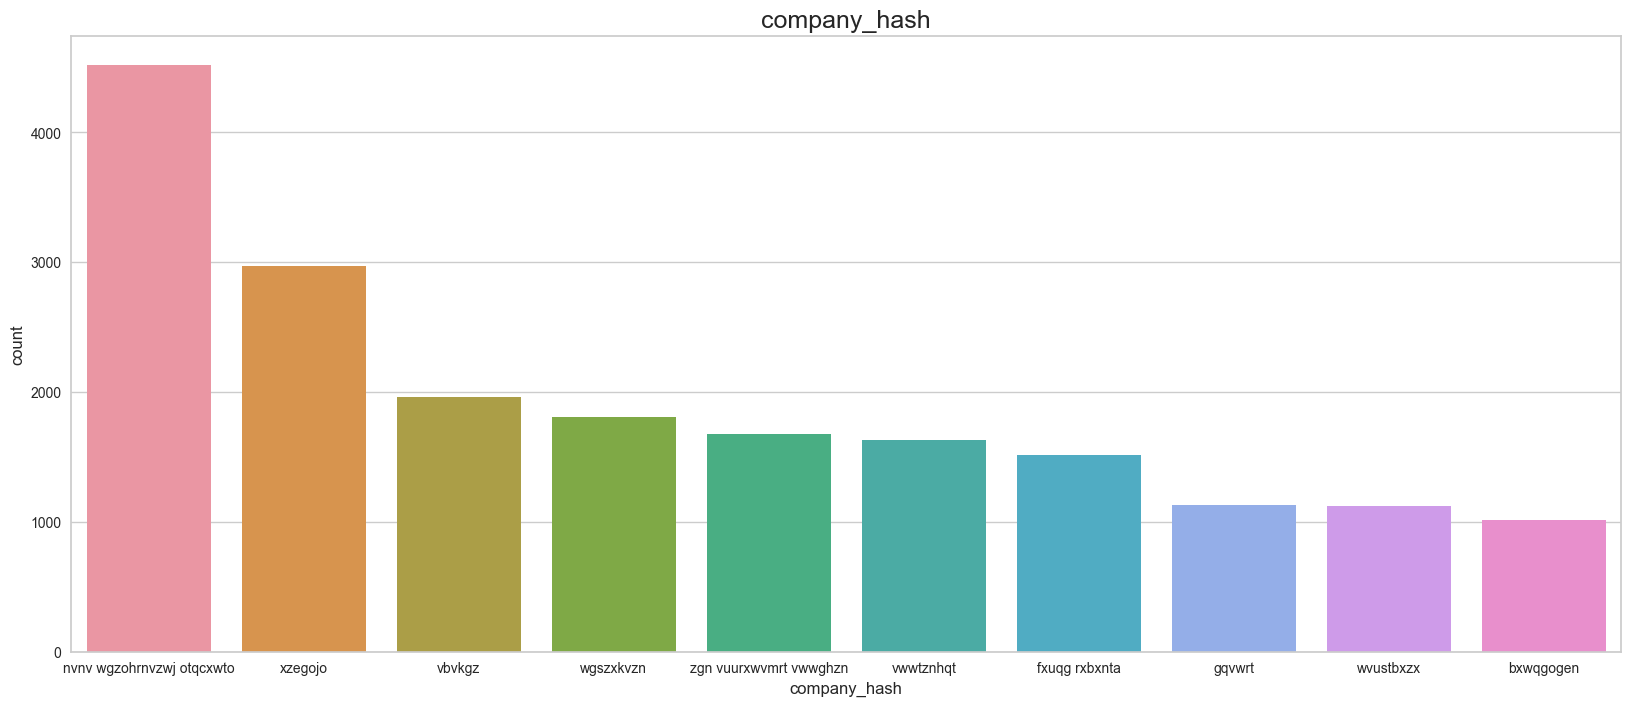

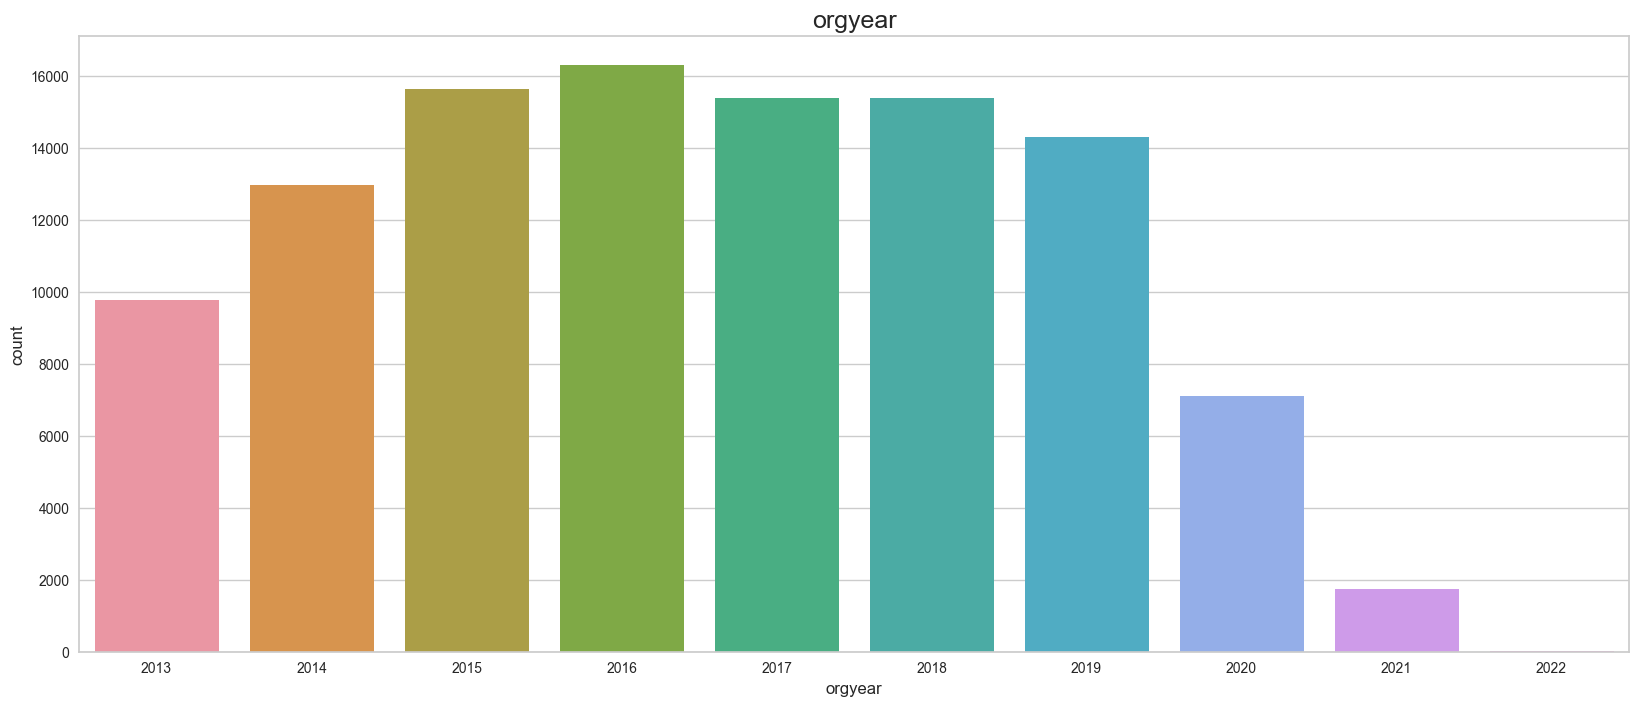

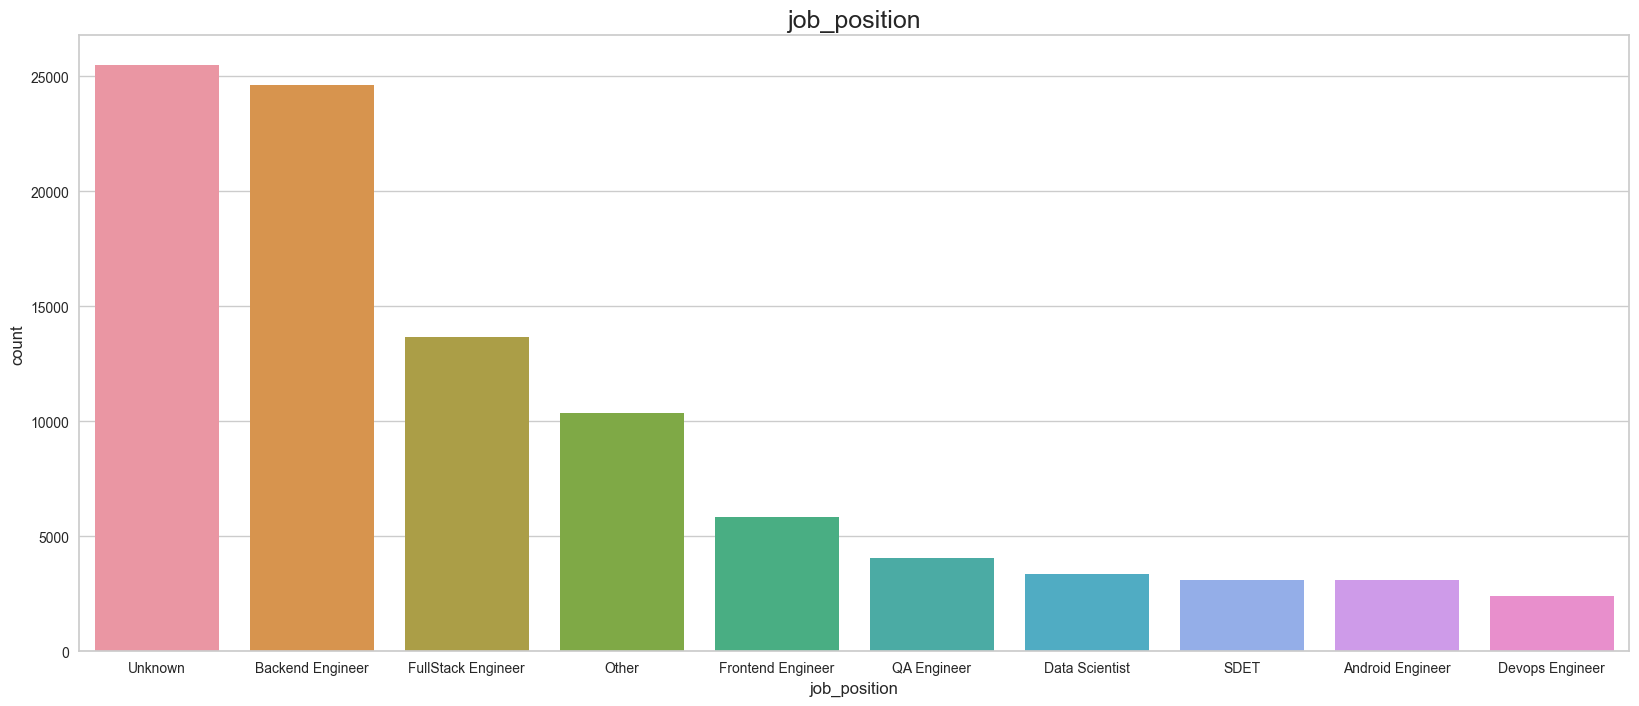

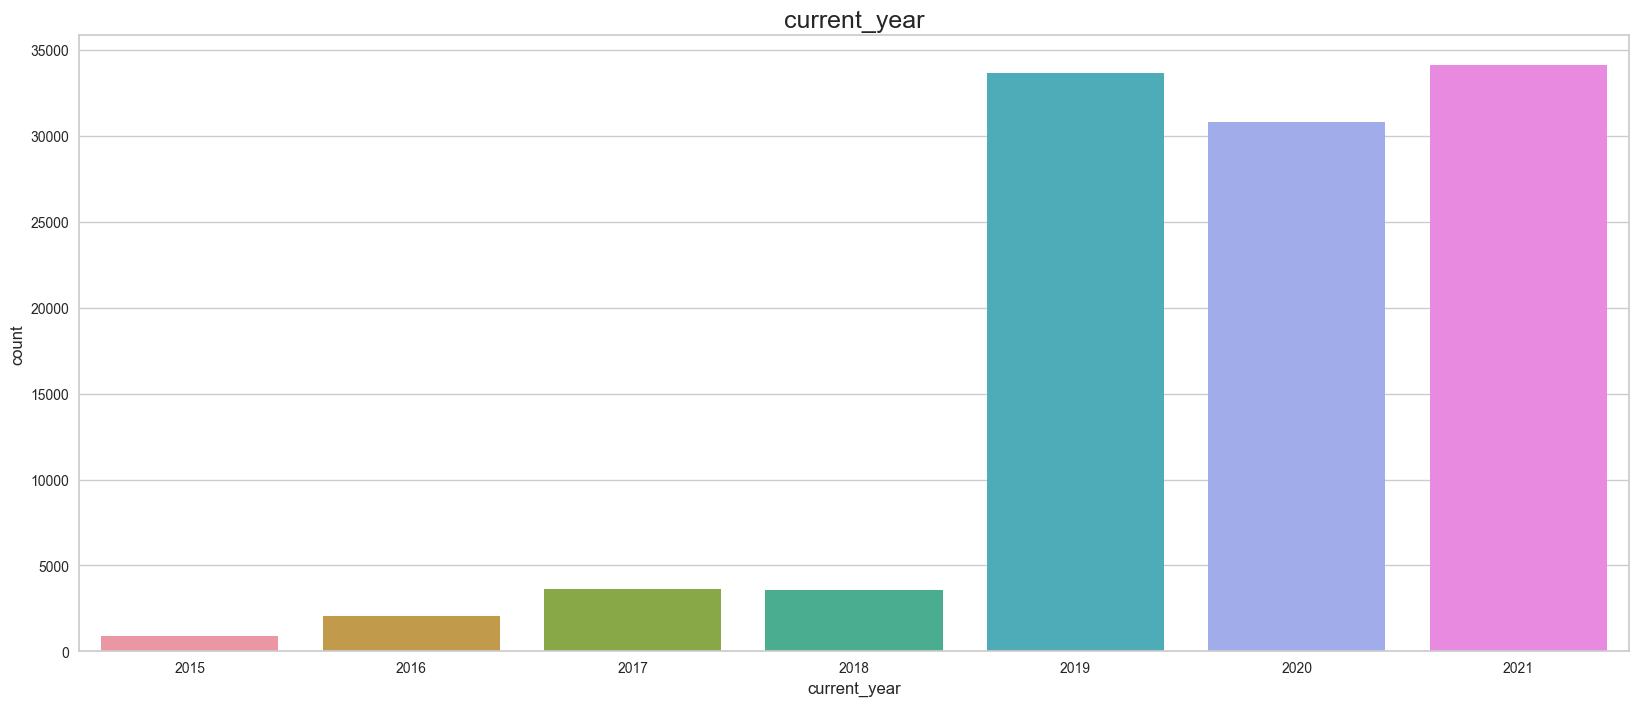

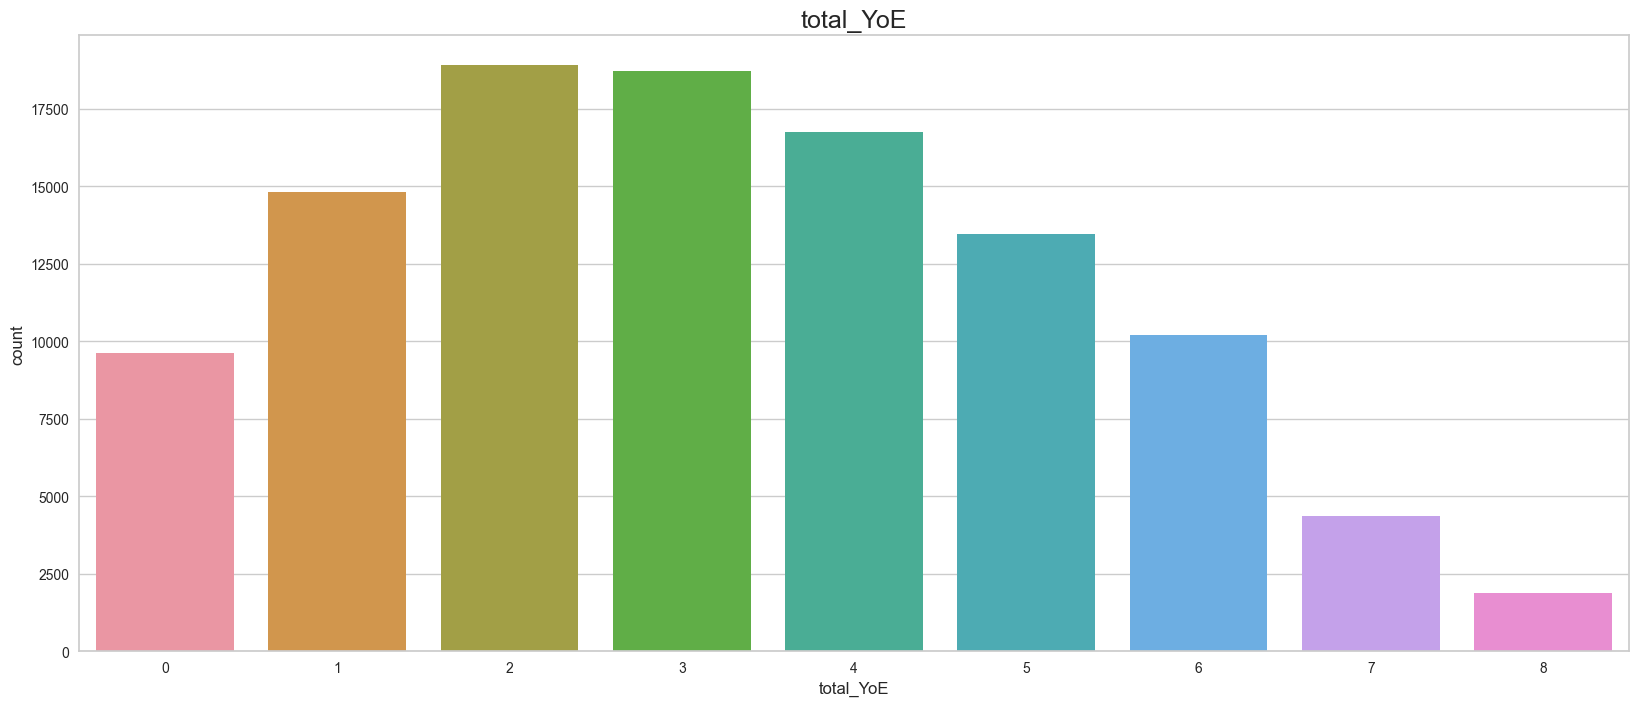

In [62]:
cols = ['company_hash', 'orgyear', 'job_position', 'current_year', 'total_YoE']
for col in cols:
    temp_df = data.copy()
    temp_df = data.groupby(col).size().reset_index(name = 'count').sort_values('count', ascending = 0).head(10)
    
    plt.figure(figsize=(20,8))
    sns.barplot(data = temp_df, x = col, y = 'count')
    plt.title(col, size = 18)

plt.show()

- The top few companies by count ("nvnv wgzohrnvzwj otqcxwto," "xzegojo," "vbvkgz") are likely to be significant players, either because they employ a large number of people or because they are frequently referenced in the data.
- The data has orgyear, with 2016 having the highest count.
- The number of occurrences for each job_position, with unknown category and Backend Engineer being the most frequent.
- The chart indicates the count of records for each current_year(ctc_updated_year), with 2019-20 having the highest count.
- The total_YoE, with 2 and 3 years of experience being the most common.

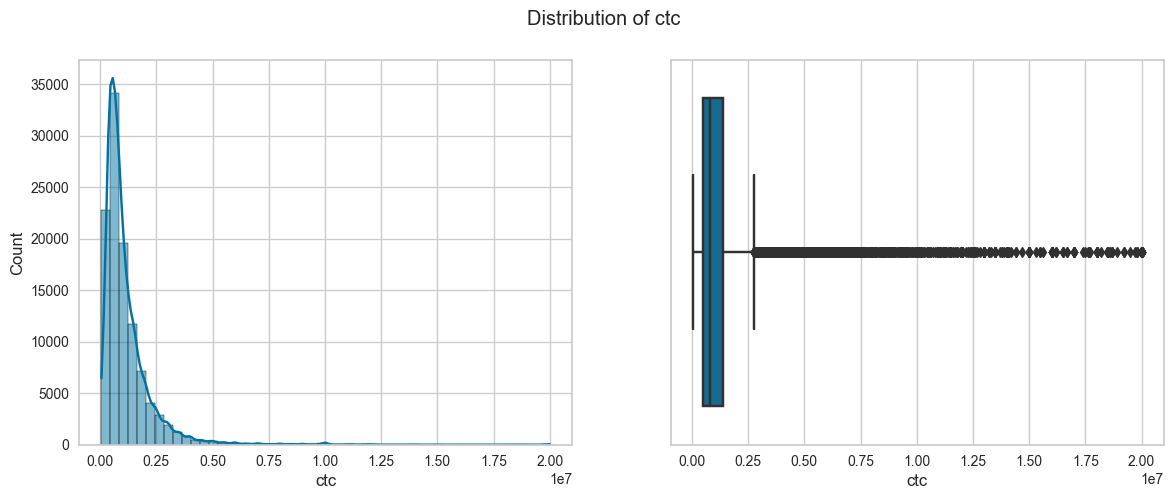

In [63]:
plt.figure(figsize = (14, 5))

plt.subplot(121)
sns.histplot(data['ctc'],kde=True, bins = 50)

plt.subplot(122)
sns.boxplot(data=data , x='ctc')

plt.suptitle('Distribution of ctc')
plt.show()

- The ctc is right skewed showing that, There can be outliers.
- The majority of employees have lower CTC values, clustered towards the left side of the distribution. 
- A smaller number of employees with very high salaries are creating the right tail, pulling the mean CTC to the right.

## Bivariate Analysis:

In [64]:
Top_paying_companies = data.groupby('company_hash')['ctc'].mean().reset_index(name = 'avg_ctc').sort_values('avg_ctc', ascending = 0)

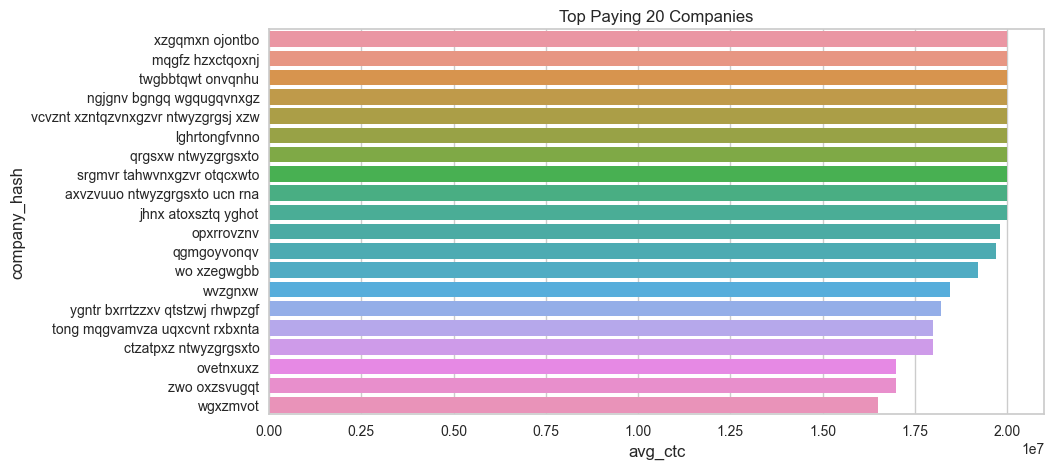

In [65]:
plt.figure(figsize = (10, 5))
sns.barplot(data = Top_paying_companies[:20], y = 'company_hash', x ='avg_ctc')
plt.title("Top Paying 20 Companies")
plt.show()

- From this chart, we can infer that several companies, represented by company_hash, are offering top ctc (Cost to Company) packages that are very close to each other.
- The similarity in these values suggests that these companies are competitive in their compensation offerings, with only slight variations in the top ctc amounts.

In [66]:
Top_paying_jobs = data.groupby('job_position')['ctc'].max().reset_index(name = 'max_ctc').sort_values('max_ctc', ascending = 0)

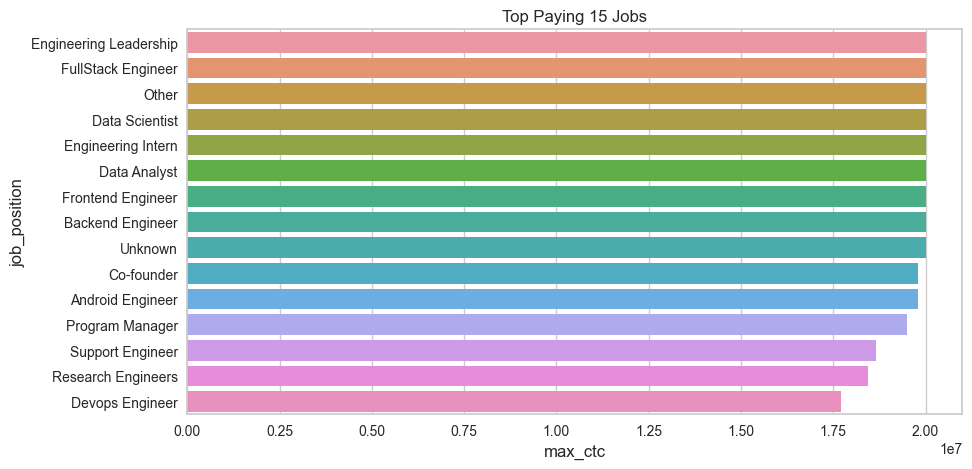

In [67]:
plt.figure(figsize = (10, 5))
sns.barplot(data = Top_paying_jobs[:15], y = 'job_position', x ='max_ctc')
plt.title("Top Paying 15 Jobs")
plt.show()

- Engineering Leadership, FullStack Engineer, Data Scientists, Backend Engineers, Frontend Engineers are as the highest-paying jobs, with the maximum CTC.
- Cofounders, Android, Engineering intern and Program Manager follow closely behind, with similar maximum CTCs, indicating that technical engineering roles are among the highest paid.
- Specialized roles like Research Engineers are also among the top, highlighting the value placed on niche technical expertise.
- The Unknown category is surprisingly high on the list, indicating that there may be high compensation for roles that aren't specifically categorized or that may be emerging or unique to certain industries.
- Support Engineer and Devops Engineer, while generally seen as less specialized, also feature among the top 15, suggesting that in certain contexts or companies, these roles can offer very competitive salaries.
- **The list includes a mix of roles, from traditional engineering positions to more specialized roles like Data Scientist and DevOps Engineer, showing that a broad range of technical and managerial skills are highly compensated.**

In [68]:
Top_ctc_per_Exp = data.groupby('total_YoE')['ctc'].max().reset_index(name = 'max_ctc').sort_values('max_ctc', ascending = 0)
avg_ctc_per_Exp = data.groupby('total_YoE')['ctc'].mean().reset_index(name = 'avg_ctc').sort_values('avg_ctc', ascending = 0)

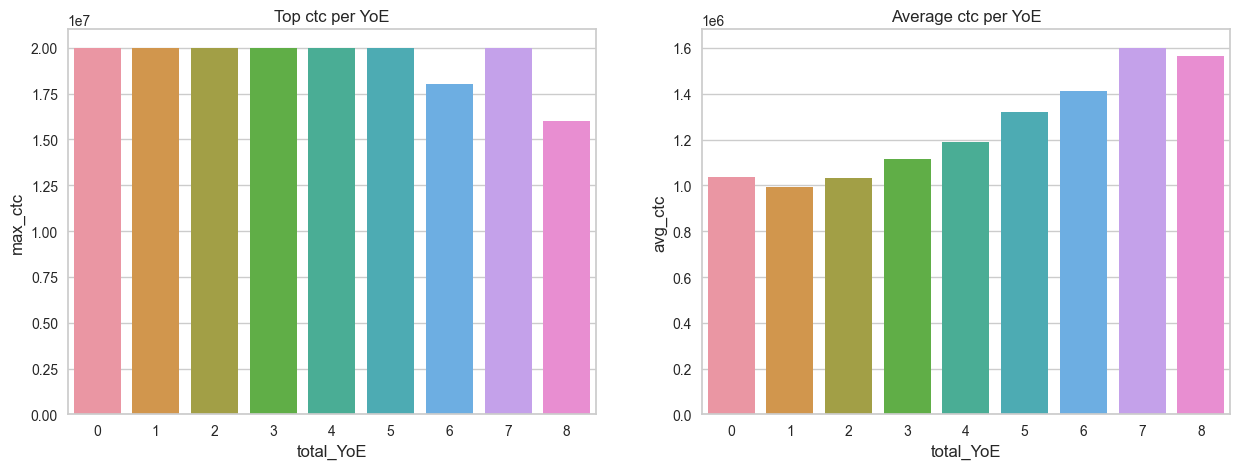

In [69]:
plt.figure(figsize = (15, 5))

plt.subplot(1,2,1)
# plt.figure(figsize = (10, 5))
sns.barplot(data = Top_ctc_per_Exp[:15], x = 'total_YoE', y ='max_ctc')
plt.title("Top ctc per YoE")

plt.subplot(1,2,2)
# plt.figure(figsize = (10, 5))
sns.barplot(data = avg_ctc_per_Exp[:15], x = 'total_YoE', y ='avg_ctc')
plt.title("Average ctc per YoE")

plt.show()

- The maximum compensation seems to level off regardless of experience, indicating a potential ceiling in salary, but the average compensation generally increases with experience, aligning with expectations.

## Multivariate Analysis:

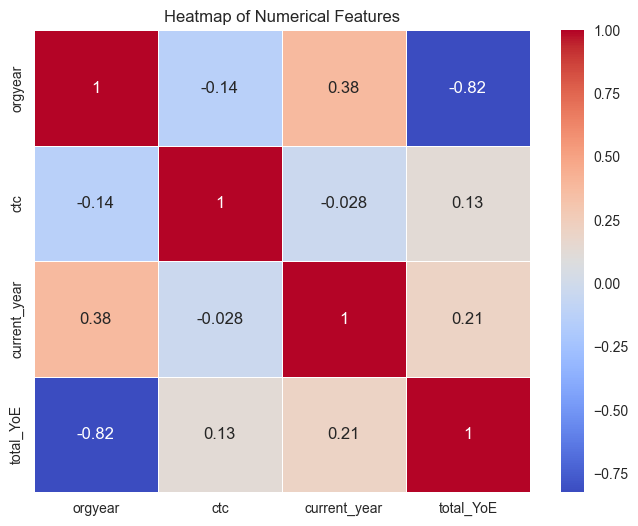

In [70]:
# Heatmap

plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Numerical Features')
plt.show()

- There is a strong negative correlation (-0.82) between orgyear and total_YoE.
- There's a low negative correlation (-0.14) between orgyear and ctc (compensation). This might imply that people who have been with an organization longer may not necessarily have higher compensation.
- There's a low positive correlation (0.13) between ctc and total_YoE, indicating that as total years of experience increase, compensation tends to increase as well, which is expected.

## Manual Clustering:

**Manual Clustering on the basis of learner’s company, job position and years of experience**

In [71]:
# Compute summary statistics
summary_stats = data.groupby(['company_hash', 'job_position', 'total_YoE'])['ctc'].agg(['mean', 'median', 'max', 'min', 'count']).reset_index()
summary_stats.columns = ['company_hash', 'job_position', 'total_YoE', 'mean1_ctc', 'median_ctc', 'max_ctc', 'min_ctc', 'count_ctc']

# Merge summary stats with original dataset
data_temp = pd.merge(data, summary_stats, on=['company_hash', 'job_position', 'total_YoE'], how = 'left')

# Create flag for CTC comparison
data_temp['ctc_flag'] = data_temp.apply(lambda x: 1 if x['ctc'] > x['mean1_ctc'] else (2 if x['ctc'] == x['mean1_ctc'] else 3), axis=1)

In [72]:
data_temp.columns

Index(['email_hash', 'company_hash', 'orgyear', 'ctc', 'job_position',
       'current_year', 'total_YoE', 'mean1_ctc', 'median_ctc', 'max_ctc',
       'min_ctc', 'count_ctc', 'ctc_flag'],
      dtype='object')

In [73]:
data_temp['ctc_flag'].value_counts()

2    52303
3    33043
1    23356
Name: ctc_flag, dtype: int64

**Manual Clustering on the basis of learner’s company and job position**

In [74]:
# Calculate average CTC at company & job position level
avg_ctc_company_job = data.groupby(['company_hash', 'job_position'])['ctc'].mean().reset_index(name='mean2_ctc')

# Merge average CTC with original data
data_temp = pd.merge(data_temp, avg_ctc_company_job, on=['company_hash', 'job_position'], how = 'left')

# Create Class flag
data_temp['class_flag'] = data_temp.apply(lambda x: 1 if x['ctc'] > x['mean2_ctc'] else (2 if x['ctc'] == x['mean2_ctc'] else 3), axis=1)

In [75]:
data_temp.columns

Index(['email_hash', 'company_hash', 'orgyear', 'ctc', 'job_position',
       'current_year', 'total_YoE', 'mean1_ctc', 'median_ctc', 'max_ctc',
       'min_ctc', 'count_ctc', 'ctc_flag', 'mean2_ctc', 'class_flag'],
      dtype='object')

In [76]:
data_temp['class_flag'].value_counts()

3    44358
2    34637
1    29707
Name: class_flag, dtype: int64

**Manual Clustering on the basis of learner’s company**

In [77]:
# Calculate average CTC at company level
avg_ctc_company = data.groupby('company_hash')['ctc'].mean().reset_index(name='mean3_ctc')

# Merge average CTC with original data
data_temp = pd.merge(data_temp, avg_ctc_company, on='company_hash', how = 'left')

# Create Tier flag
data_temp['tier_flag'] = data_temp.apply(lambda x: 1 if x['ctc'] > x['mean3_ctc'] else (2 if x['ctc'] == x['mean3_ctc'] else 3), axis=1)

In [78]:
data_temp.columns

Index(['email_hash', 'company_hash', 'orgyear', 'ctc', 'job_position',
       'current_year', 'total_YoE', 'mean1_ctc', 'median_ctc', 'max_ctc',
       'min_ctc', 'count_ctc', 'ctc_flag', 'mean2_ctc', 'class_flag',
       'mean3_ctc', 'tier_flag'],
      dtype='object')

In [79]:
data_temp['tier_flag'].value_counts()

3    54438
1    34007
2    20257
Name: tier_flag, dtype: int64

In [80]:
data_temp['diff_ctc'] = data_temp['ctc'] - data_temp['mean1_ctc']
data_temp['diff_class'] = data_temp['ctc'] - data_temp['mean2_ctc']
data_temp['diff_tier'] = data_temp['ctc'] - data_temp['mean3_ctc']

In [81]:
data_temp.head(3)

,email_hash,company_hash,orgyear,ctc,job_position,current_year,total_YoE,mean1_ctc,median_ctc,max_ctc,min_ctc,count_ctc,ctc_flag,mean2_ctc,class_flag,mean3_ctc,tier_flag,diff_ctc,diff_class,diff_tier
0,0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...,nqsn axsxnvr,2013,250000,Backend Engineer,2020,7,250000.0,250000.0,250000,250000,1,2,2.500000e+05,2,2.500000e+05,2,0.0,0.000000,0.000000
1,0001b94dbb1e85477b07fb6558ead3456c3735893c81f4...,nvnv wgzohrnvzwj otqcxwto,2018,450000,Database Administrator,2021,3,512400.0,450000.0,800000,390000,5,3,4.824814e+05,3,5.817762e+05,3,-62400.0,-32481.407407,-131776.232743
2,00022dc29c7f77032275182b883d4f273ea1007aefc437...,xzeqvwrgha ntwyzgrgsxto,2016,750000,Frontend Engineer,2020,4,750000.0,750000.0,750000,750000,1,2,1.375000e+06,3,1.107500e+06,3,0.0,-625000.000000,-357500.000000


## Answering some questions based on manual clustering:

**1. Top 10 Employees Earning More than Most in the Company (Tier 1)**

In [82]:
top_10_employees_tier1 = data_temp[data_temp['tier_flag'] == 1].sort_values('diff_tier',ascending=False).head(10)
top_10_employees_tier1[['email_hash','ctc','mean3_ctc']]

,email_hash,ctc,mean3_ctc
20975,317dd00cd99c43f133ff80197d7c19ec6b82a28855a530...,20000000,8.507630e+05
31978,4beee431866cc493f7cc6689c2f00023683575a29e3174...,20000000,8.715395e+05
93158,db6866f146f012adb03831a251f892277cf076938cc1fc...,19998000,9.519454e+05
68308,a1059b67e2601e496bc20e8bb99f9ebcc4c0247b36fcd9...,20000000,1.052409e+06
54545,80f1ae60373f0ada3b75ce19eb585f8cf112de3cfa6ea7...,20000000,1.143395e+06
51270,795097fef8bd8160b3fee6f3baf022d104e62804a1974f...,20000000,1.149762e+06
14889,22da8fa9276061db10a4c5dc901b679b303f13cf25aee4...,20000000,1.314652e+06
39967,5e67d0110e4ee01a7cbed86bb7c716a32c5ee23cf7c551...,20000000,1.344700e+06
60122,8ded366b3cdf8b2ac7ea6ce0a94e040be9eef7b2cfbd9e...,20000000,1.417043e+06
72238,aa1d9bece779ff63a54bd6d32452e3f938a0afc6a52c6b...,20000000,1.440654e+06


**2. Top 10 Employees of Data Science in Each Company Earning More than Their Peers (Class 1)**

In [83]:
# getting all unique job_positions
unique_jobs = data['job_position'].unique()
# print(unique_jobs)

# Defining the regex pattern to match 'data', 'scientist', or 'analyst'
pattern = re.compile(r'\b(data scientist)\b', re.IGNORECASE)

# Filter the unique job positions that match the pattern
filtered_jobs = [i for i in unique_jobs if pattern.search(i)]
print(filtered_jobs)

['Data Scientist', 'Senior Data Scientist', 'Data Scientist 2', 'Associate Data Scientist', 'Data Scientist II']


In [84]:
top_10_data_science_employees_class1 = data_temp[(data_temp['class_flag'] == 1)&(data_temp['job_position'].isin(filtered_jobs))].sort_values('diff_class',ascending=False).groupby('company_hash').head(10)[['email_hash','ctc','mean2_ctc']]
top_10_data_science_employees_class1

,email_hash,ctc,mean2_ctc
54545,80f1ae60373f0ada3b75ce19eb585f8cf112de3cfa6ea7...,20000000,1.859652e+06
27364,40a415ae6cd1eba19ac74f88dc2f0b7e19f398092236ee...,10900000,2.264762e+06
13666,1ff756b1855c0faa035c7873dee21d01a6d4b2cb18f0eb...,10000000,1.888636e+06
85142,c8aa6d972a077a45edbca5a1347878dbfdb3307b366b9b...,10000000,1.888636e+06
88794,d1290b7e2d85c75902b863ccc3e4aafdd6e6eb07a10a00...,12000000,5.350000e+06
...,...,...,...
37055,57bc66d9f65e7c12783583ebea7d40a11d3a9a3bc6bcd7...,1650000,1.644286e+06
35334,53c026a98033fe0aa962e94345e42941d752e19e2ab6a8...,580000,5.750000e+05
92066,d8e2b9ced91fd7e10d5253b8696fae4fe21276f9b46d3f...,1650000,1.647273e+06
5847,0d60373811001271d3b7ba9c0764271cf1119769cb09b0...,900000,8.983330e+05


**3. Bottom 10 Employees of Data Science in Each Company Earning Less than Their Peers (Class 3)**

In [85]:
bottom_10_data_science_employees_class3 = data_temp[(data_temp['class_flag'] == 3)&(data_temp['job_position'].isin(filtered_jobs))].sort_values('diff_class',ascending=True).groupby('company_hash').head(10)[['email_hash','ctc','mean2_ctc']]
bottom_10_data_science_employees_class3

,email_hash,ctc,mean2_ctc
26038,3d7a81a35c9a71ed6bc696e29886b8ea486cc0516188a6...,500000,5.750000e+06
5584,0cc00f713e6a17971a4e783e5235cc08e27cf0bed506df...,2100000,7.050000e+06
19191,2d3c2b950cb00f6304dd6598297199e87df1e0fd1a546b...,400000,5.200000e+06
95209,e04be13d40bf85a8751a714985b1a146aba0b84c032cfd...,9000000,1.350000e+07
86347,cb6b3896ca276aa4e9f0d76076bba929b18e007d03d564...,145000,4.522500e+06
...,...,...,...
83365,c45d8c896fb3071b2cfd5fbcb80a56c29d24fe55c97aaf...,1000000,1.005833e+06
11766,1b70ff6a8f05f8521a61319d80ef663b9a8a4fdd9dcf10...,2700000,2.704000e+06
93447,dc23b3507676b636918e88a04bde9cd6d281437cbc8829...,1200000,1.202500e+06
10191,17af22c0b2e2ca4436b37ac3dd6fb8a4f996888ee7606e...,650000,6.525000e+05


**4. Bottom 10 Employees Earning Less than Most in the Company (Tier 3)**

In [86]:
bottom_10_data_science_employees_class3 = data_temp[(data_temp['tier_flag'] == 3)].sort_values('diff_tier',ascending=True).head(10)[['email_hash','ctc','mean3_ctc']]
bottom_10_data_science_employees_class3

,email_hash,ctc,mean3_ctc
81552,c00ede24a1333623f1413625d61cb8552f54a6ba156502...,200000,1.010000e+07
84417,c6d42d6364e753aab8b35b2f3d39ca06e88a121462dbe9...,700000,1.025000e+07
44074,682578bcd0ac48b6bb93bc63e597903b4e4ddfba8cc11f...,450000,9.825000e+06
86156,cb015570a917e06202f23468b5fe668f1bf112c15eafdd...,1000000,9.200000e+06
106019,f98b704ea6e0fe01eb8d2f226a9265ba13550fff8322fe...,154000,8.077000e+06
104308,f57210bb83b06e7c7bdfb94546463bcdedd178d914f20d...,545000,8.272500e+06
42412,6410afe6d61b914d5d25d0beca785044d5c6cdc59af19d...,2600000,9.800000e+06
11915,1bbefc40f20001b1ff159aba28ced99ec429a15c010ee1...,1500000,8.250000e+06
5527,0c9b0d53b1b92b492aa7c7dc96768b54dc04066792c500...,2000000,8.500000e+06
15112,23618ec0d652c371c11e1f5b90f537379b258833f27ac4...,110000,6.316667e+06


**5. Top 10 Employees in Each Company-X Department with 5/6/7 Years of Experience Earning More than Their Peers (Tier X)**

In [87]:
top_10_exp_tierX = data_temp[data_temp['total_YoE'].isin([5,6,7])].sort_values(['company_hash', 'job_position','mean1_ctc'],ascending=[1,1,0]).groupby(['company_hash', 'job_position']).head(10)[['email_hash','mean1_ctc']]
top_10_exp_tierX

,email_hash,mean1_ctc
48801,735aeec9e89759154f3fa4f8f99e3da93b821669684298...,650000.0
51715,7a64650f7c2c73dfe6b1a4c410eb64641e4dacd371bfda...,1000000.0
6115,0e0b52e1fa76e607ca155769bbfb978c4dc91b7482df27...,1200000.0
70195,a58fadbfbc00c007dfe6e5d5891f2dda013eb5cc66552a...,1600000.0
73934,ae37b041e3ec19f8600c157cd34d6661674d9dcb90d796...,1500000.0
...,...,...
21835,3385dc93ba44f4f1cc237ef4f8e057dab2f693d8961b64...,1800000.0
15090,234f0f52e89b20231f5685551b865a08a5634189e1ffec...,1887500.0
31349,4a5bc81d942bb281d18a27b6ceb622de65d07a13bc5ab9...,1887500.0
45249,6aeb0a4c55bd87b64c70a963b058a61c29b8654ac86fe9...,1180000.0


**6. Top 10 Companies Based on Their CTC**

In [88]:
top_10_companies = avg_ctc_company.sort_values(by = 'mean3_ctc', ascending = False).head(10)[['company_hash','mean3_ctc']]
top_10_companies

,company_hash,mean3_ctc
24112,xzgqmxn ojontbo,20000000.0
7624,mqgfz hzxctqoxnj,20000000.0
16976,twgbbtqwt onvqnhu,20000000.0
8556,ngjgnv bgngq wgqugqvnxgz,20000000.0
18874,vcvznt xzntqzvnxgzvr ntwyzgrgsj xzw,20000000.0
7027,lghrtongfvnno,20000000.0
13750,qrgsxw ntwyzgrgsxto,20000000.0
15571,srgmvr tahwvnxgzvr otqcxwto,20000000.0
1230,axvzvuuo ntwyzgrgsxto ucn rna,20000000.0
6595,jhnx atoxsztq yghot,20000000.0


**7. Top 2 Positions in Every Company Based on Their CTC**

In [89]:
top_2_positions_per_company = avg_ctc_company_job.sort_values(by =['company_hash','mean2_ctc'], ascending = [1, 0]).groupby('company_hash').head(2)[['company_hash','job_position']]
top_2_positions_per_company

,company_hash,job_position
0,0,Unknown
1,0000,Other
2,01 ojztqsj,Android Engineer
3,05mz exzytvrny uqxcvnt rxbxnta,Unknown
4,1,Unknown
...,...,...
43318,zyco xzaxv,Other
43319,zyvzwt fgga qtztfvr eqvzwyxogq yi,Unknown
43320,zz,Other
43321,zzb ztdnstz vacxogqj ucn rna,FullStack Engineer


# Standardization

- Since the data set size is very large, we will take only a sample of data with 3000 records for model building.

In [90]:
data_reduced = data.sample(n=3000, random_state=42)

### Feature Encoding:

In [91]:
# Dropping column 'email_hash'
data_encoded = data_reduced.drop('email_hash', axis=1)

# Label encode 'company_hash' and 'job_position'
label_encoder = LabelEncoder()
data_encoded['company_hash_encoded'] = label_encoder.fit_transform(data_encoded['company_hash'])
data_encoded['job_position_encoded'] = label_encoder.fit_transform(data_encoded['job_position'])

# dropping the original categorical columns after encoding
data_encoded = data_encoded.drop(['company_hash', 'job_position'], axis=1)

In [92]:
data_encoded.head(3)

,orgyear,ctc,current_year,total_YoE,company_hash_encoded,job_position_encoded
48349,2018,1200000,2020,2,502,19
65221,2013,650000,2019,6,547,33
1635,2017,600000,2021,4,1394,48


### Feature Scaling:

In [93]:
# Standardizing numerical columns

scaler = StandardScaler()
data_scaled = data_encoded.copy()

# Fit and transform the data
data_scaled_arr = scaler.fit_transform(data_scaled)

# Convert the resulting array back into a DataFrame
data_scaled = pd.DataFrame(data_scaled_arr, columns=data_scaled.columns, index=data_scaled.index)

In [94]:
data_scaled.head(3)

,orgyear,ctc,current_year,total_YoE,company_hash_encoded,job_position_encoded
48349,0.676641,0.001340,0.241430,-0.576317,-0.682260,-0.339117
65221,-1.652320,-0.395100,-0.579761,1.398500,-0.587749,0.529989
1635,0.210849,-0.431141,1.062622,0.411091,1.191155,1.461174


# Model Building

## K-Means Clustering

### Elbow Method for Determining Cluster Amount:

In [95]:
cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=20)
    clusters.fit(data_scaled)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({"Num_Clusters":cluster_range,"Cluster_Errors":cluster_errors})
clusters_df

,Num_Clusters,Cluster_Errors
0,1,18000.000000
1,2,13903.073381
2,3,12107.645433
3,4,10751.266172
4,5,9495.925663
5,6,8535.814983
6,7,7719.389784
7,8,7205.837610
8,9,6778.711739
9,10,6411.966614


## Within-Cluster Sum-of-Squares Criterion

**Used Elbow Graph to find optimum number of clusters (K value) from K values range.**

 **The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion WCSS.**

 **Random state can be anything from 0 to 42, but the same number to be used everytime,so that the results don't change.**

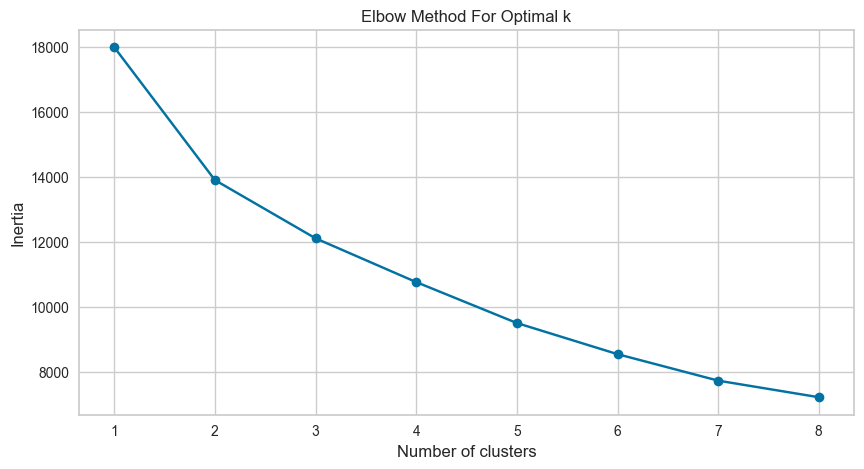

In [96]:
wcss = []
K = range(1, 9)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(K, wcss, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

**There is a clear "elbow" visible. A choice of 2 clusters seems to be fair. Let's see the silhouette score.**

### Silhouette Scores for Different k:

In [97]:
silhouette_scores = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    cluster_labels = kmeans.fit_predict(data_scaled)
    
    # Calculate the silhouette score for each k
    score = silhouette_score(data_scaled, cluster_labels)
    silhouette_scores.append(score)
    
    print(f"For n_clusters = {k}, the silhouette score is {score:.3f}")

For n_clusters = 2, the silhouette score is 0.223
For n_clusters = 3, the silhouette score is 0.201
For n_clusters = 4, the silhouette score is 0.206
For n_clusters = 5, the silhouette score is 0.201
For n_clusters = 6, the silhouette score is 0.214
For n_clusters = 7, the silhouette score is 0.218
For n_clusters = 8, the silhouette score is 0.207
For n_clusters = 9, the silhouette score is 0.208


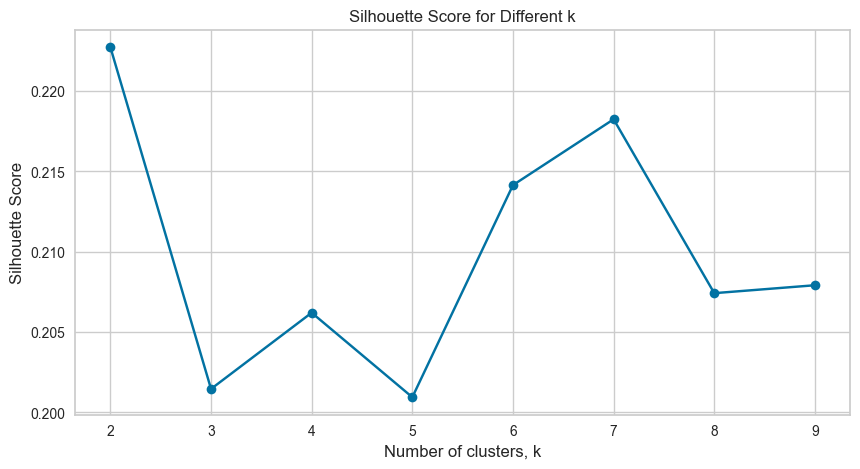

In [98]:
plt.figure(figsize=(10, 5))
plt.plot(range(2, 10), silhouette_scores, 'bo-')
plt.xlabel('Number of clusters, k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different k')
plt.show()

**Silhouette score method indicates the best options for number of clusters would be 2.**

###  K-Means Clustering using K=2:

In [99]:
optimal_k = 2

model = KMeans(n_clusters=optimal_k, random_state=42, init = 'k-means++')
y_predicted = model.fit_predict(data_scaled)

data_scaled['clusters']= y_predicted
data_scaled.head()

,orgyear,ctc,current_year,total_YoE,company_hash_encoded,job_position_encoded,clusters
48349,0.676641,0.001340,0.241430,-0.576317,-0.682260,-0.339117,0
65221,-1.652320,-0.395100,-0.579761,1.398500,-0.587749,0.529989,1
1635,0.210849,-0.431141,1.062622,0.411091,1.191155,1.461174,0
81577,2.074018,-0.560885,1.062622,-1.563726,1.048338,-0.897828,0
13132,0.210849,-0.359060,-0.579761,-0.576317,1.048338,0.529989,0


In [100]:
# these are nothing but cluster labels...
y_predicted

array([0, 1, 0, ..., 1, 1, 1])

In [101]:
model.labels_

array([0, 1, 0, ..., 1, 1, 1])

In [102]:
model.cluster_centers_

array([[ 0.85166397, -0.18494886,  0.31458401, -0.71189602,  0.01841605,
         0.11319081],
       [-0.84375203,  0.18323069, -0.31166153,  0.70528252, -0.01824497,
        -0.11213926]])

#### Within cluster sum of squared

- The lower values of inertia are better and zero is optimal.
- Inertia is the sum of squared error for each cluster.
- Therefore the smaller the inertia the denser the cluster (closer together all the points are).

In [103]:
model.inertia_

13903.073380596496

In [104]:
data_reduced_kmeans = data_reduced.copy()
data_reduced_kmeans['Kmeans_Label'] = model.labels_

In [105]:
# Group data by Clusters (K=2)

data_reduced_kmeans.groupby('Kmeans_Label').agg(['mean'])

,orgyear,ctc,current_year,total_YoE
,mean,mean,mean,mean
Kmeans_Label,,,,
0,2018.375754,9.415532e+05,2020.089082,1.725385
1,2014.735899,1.452346e+06,2019.326476,4.595886


**We can see that, the clusters represent different segments of your dataset based on the orgyear, ctc, current_year, and total_YoE features. Cluster 0 seems to include newer, lower-paying positions with less experience, while Cluster 1 includes more established, higher-paying positions with greater experience..**

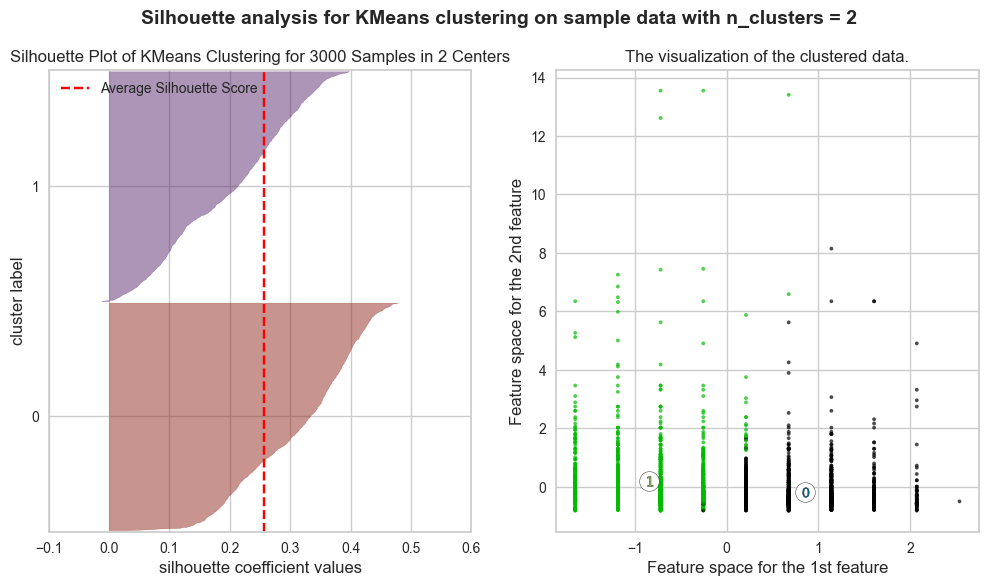

In [106]:
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Ensure 'model' is defined and fitted
model = KMeans(n_clusters=2, random_state=42)
model.fit(data_scaled)

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
fig.set_size_inches(12, 6)

# 1st Plot: Silhouette Visualizer
sil_visualizer1 = SilhouetteVisualizer(model, ax=ax1, colors=['#922B21', '#5B2C6F'])
sil_visualizer1.fit(data_scaled)

# 2nd Plot: Actual Clusters
colors1 = cm.nipy_spectral(model.labels_.astype(float) / (model.labels_.max() + 1)) # Adjust color scaling

# Use .iloc for positional indexing
ax2.scatter(data_scaled.iloc[:, 0], data_scaled.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors1, edgecolor='k')

# Labeling the clusters
centers1 = model.cluster_centers_

# Draw white circles at cluster centers
ax2.scatter(centers1[:, 0], centers1[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers1):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

ax2.set_title("The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
              "with n_clusters = %d" % model.n_clusters), fontsize=14, fontweight='bold')

sil_visualizer1.show()
plt.show()

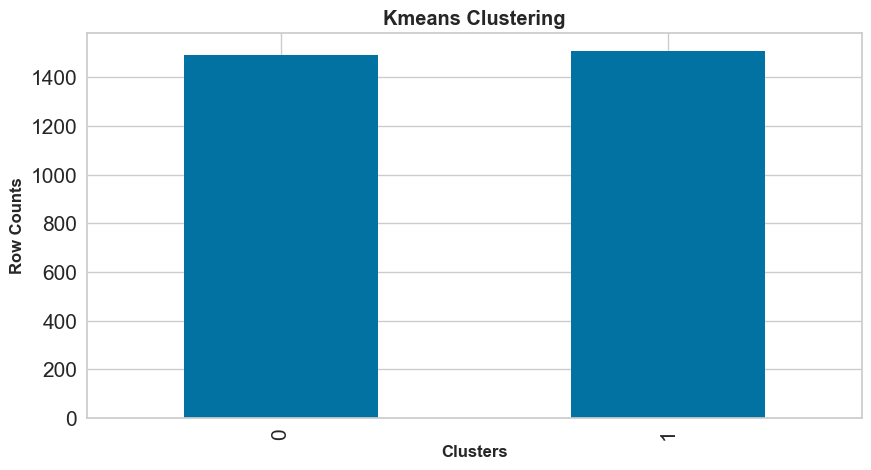

In [107]:
import matplotlib.pyplot as plt

# Group by 'Kmeans_Label' and count the occurrences in each cluster
cluster_counts = data_reduced_kmeans.groupby(['Kmeans_Label']).size()

# Create the plot
fig, ax = plt.subplots(figsize=(10, 5))
cluster_counts.plot(kind='bar', ax=ax)

# Setting labels and title
ax.set_ylabel('Row Counts', fontsize='medium', fontweight='bold')
ax.set_xlabel('Clusters', fontsize='medium', fontweight='bold')
ax.set_title('Kmeans Clustering', fontsize='large', fontweight='bold')

# Adjusting ticks
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

# Show the plot
plt.show()

### We can clearly conclude from the 2 number of clusters formed

- The silhouette analysis indicates that the clustering is moderately well-separated, with a decent average silhouette score.
- The scatter plot shows that while the clusters are somewhat distinct, there might be some overlap between them in the feature space.
- we may try different clustering methods to see if we can achieve better separation.

## Hierarchical Clustering

- Applying Dendrogram on data. Or we may apply it on Standardized/normalized indepedent variable data.
- Here diffrent linkage method from hyperparameter is used to see diff between methods for understanding.
- Ward method is commanly used since it is simpler to visualize understanding.
- Finding number of cluster's using color coding of dendrogram. Each color indicates one cluster.

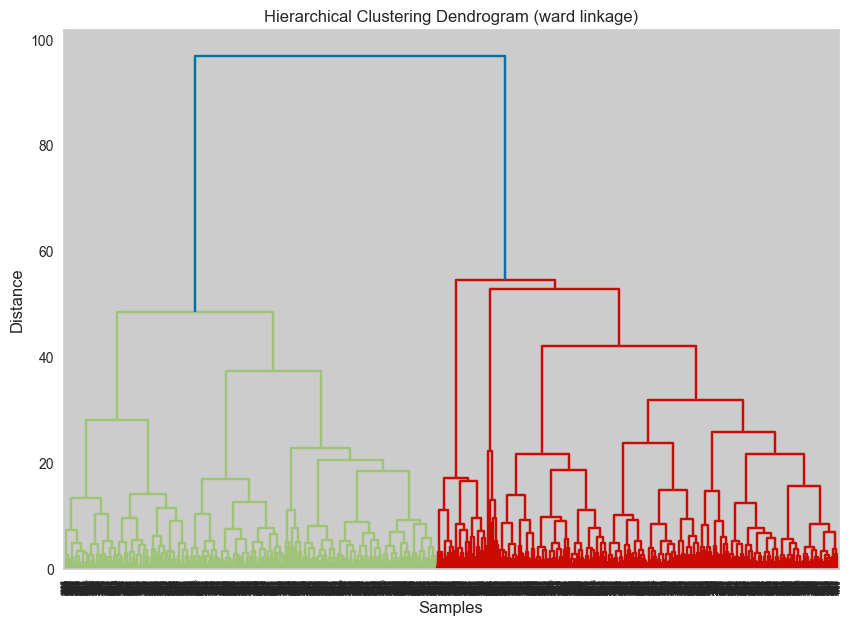

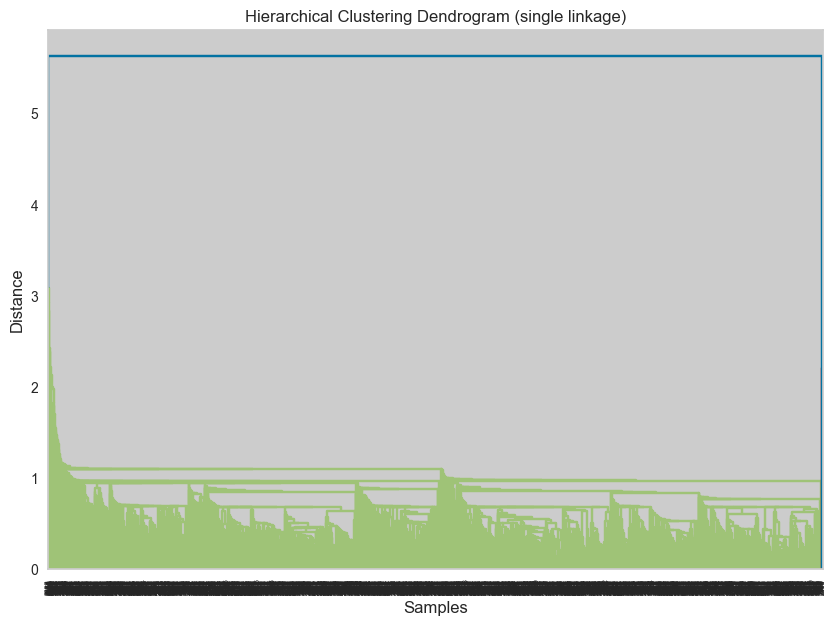

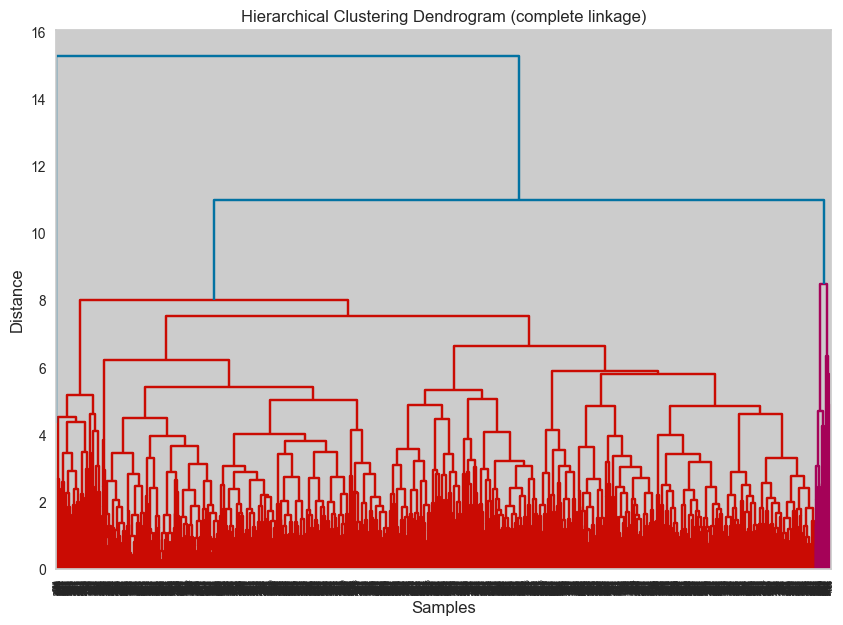

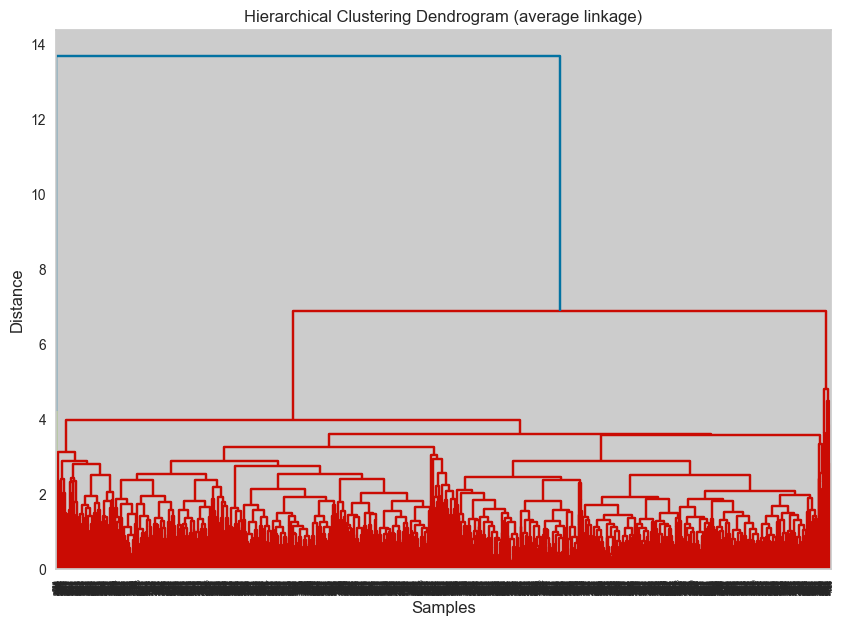

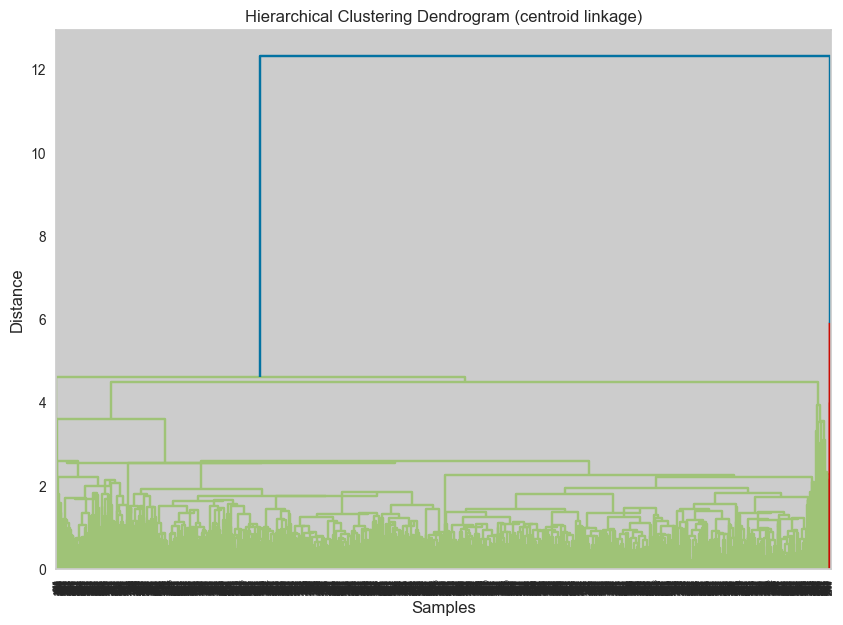

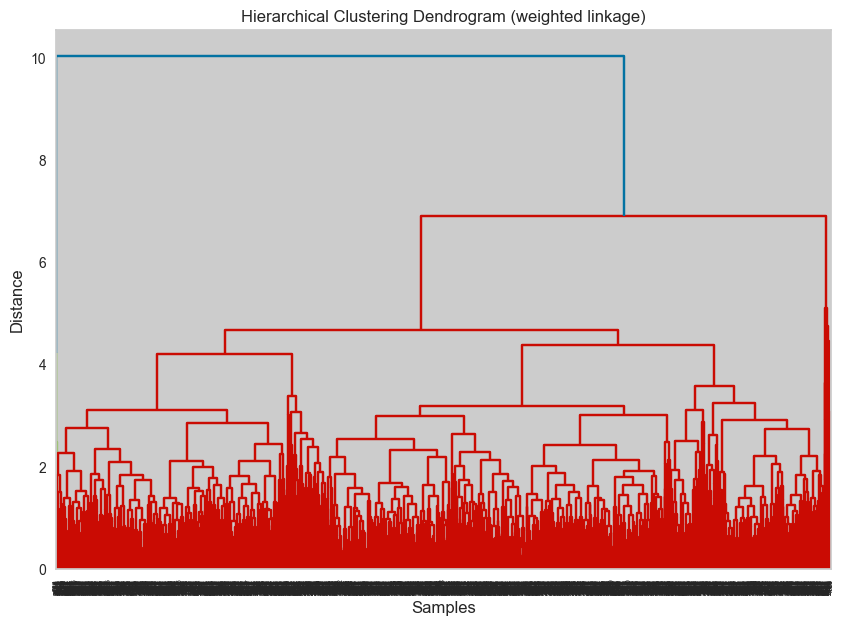

In [108]:
# Different linkage methods
methods = ['ward', 'single', 'complete', 'average', 'centroid', 'weighted']

for method in methods:
    Z = linkage(data_scaled, method=method)
    
    plt.figure(figsize=(10, 7))
    dendrogram(Z)
    plt.title(f'Hierarchical Clustering Dendrogram ({method} linkage)')
    plt.xlabel('Samples')
    plt.ylabel('Distance')
    plt.show()

In [110]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

n_clusters_list = [2, 3, 4, 5, 6, 7, 8]  # Start number from 2
linkage = "ward" 

for n_clusters in n_clusters_list:
    hie_cluster = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)  # By default, it takes linkage 'ward'
    hie_labels = hie_cluster.fit_predict(data_scaled)
    silhouette_score1 = silhouette_score(data_scaled, hie_labels)
    print(f"For n_clusters = {n_clusters}, The average silhouette_score with linkage-{linkage}: {silhouette_score1}")
print()


For n_clusters = 2, The average silhouette_score with linkage-ward: 0.24910428322859585
For n_clusters = 3, The average silhouette_score with linkage-ward: 0.2558716516101358
For n_clusters = 4, The average silhouette_score with linkage-ward: 0.26387423198676646
For n_clusters = 5, The average silhouette_score with linkage-ward: 0.21965133072364376
For n_clusters = 6, The average silhouette_score with linkage-ward: 0.19734417910825364
For n_clusters = 7, The average silhouette_score with linkage-ward: 0.18720783380196795
For n_clusters = 8, The average silhouette_score with linkage-ward: 0.18275859777237938



**The seperation in Ward Method indicate that 2 is the optimal number for clusters.**

Heirarchical clustering means creating a tree of clusters by iteratively grouping or separating data points. There are two types of hierarchical clustering: Agglomerative clustering Divisive clustering We now apply the Agglomerative clustering technique:Agglomerative clustering is kind of a bottom-up approach. Each data point is assumed to be a separate cluster at first. Then the similar clusters are iteratively combined.

### Hierarchical Clustering (Agglomerative Clustering):

In [111]:
agg_clustering = AgglomerativeClustering(n_clusters=2, linkage='ward')
y_pred_hie = agg_clustering.fit_predict(data_scaled)
print(y_pred_hie.shape)
# y_pred_hie

(3000,)


In [112]:
# Cluster numbers
agg_clustering.n_clusters_

2

In [113]:
# Clustering Score
(silhouette_score(data_scaled, agg_clustering.labels_)*100).round(3)

24.91

### Putting Cluster lables into original dataset And analysis of the same

In [114]:
# Concating Labels with 'data_reduced' dataset

data_reduced['Hierarchical_Labels'] = agg_clustering.labels_

In [115]:
data_reduced.groupby('Hierarchical_Labels').agg(['mean'])

,orgyear,ctc,current_year,total_YoE
,mean,mean,mean,mean
Hierarchical_Labels,,,,
0,2014.812621,1.471709e+06,2019.282035,4.474565
1,2018.409122,9.045342e+05,2020.161023,1.764340


**The hierarchical clustering results indicate two distinct segments:**

**Cluster 0: Older, well-established organizations with higher salaries and more experienced employees.**

**Cluster 1: Newer organizations with lower salaries and less experienced employees.**

# Actionable Insights and Recommendations

- The data suggests that technical engineering roles, especially those involving **Engineering Leadership, FullStack Engineer, Data Scientists, Backend Engineers, Frontend Engineers, 'DevOps Engineer', 'Program Manager'.** Leadership roles in specialized technical areas also command high salaries. This insight can be useful for individuals planning their career paths or companies looking to understand compensation trends across different roles.

- We have identified several top-paying companies that offer competitive salaries and are actively seeking freshers. These organizations not only provide attractive compensation packages but also present valuable opportunities for recent graduates to kickstart their careers.

- If you're looking to join a company where you can earn well and grow professionally, consider exploring opportunities with these top employers.

**The KMeans clustering analysis identified two distinct clusters within the dataset based on orgyear, ctc, current_year, and total_YoE features:**

- Cluster 0: This cluster appears to represent newer organizations with entry-level positions and lower compensation. The employees or positions in this cluster are relatively new, with less experience and lower pay.

- Cluster 1: This cluster is indicative of well-established organizations offering higher-paying positions to more experienced employees. The data suggests that these roles are more senior, with higher compensation and more experience.

**The hierarchical clustering results also revealed two distinct segments:**

- Cluster 0:This cluster includes older, well-established organizations with higher salaries and more experienced employees. It represents senior roles with greater experience and higher compensation.
- Cluster 1:This cluster represents newer organizations with lower salaries and less experienced employees. It typically includes entry-level positions or roles in newly established companies.